In [1]:
# import libraries 

In [2]:
import pandas as pd

In [3]:
import numpy as np 

In [4]:
import seaborn as sns 

In [5]:
import matplotlib

In [6]:
import matplotlib.pyplot as plt

In [7]:
from matplotlib.pyplot import figure

In [8]:
df=pd.read_csv('movies.csv') # read in data 

In [9]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [10]:
#checking for null values and data cleaning 
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
for col in df.columns:                         #percentage of data missing in each column (view format)
    pct_missing = np.mean(df[col].isnull())
    print('{} - %{}'.format(col, pct_missing))

name - %0.0
rating - %0.010041731872717789
genre - %0.0
year - %0.0
released - %0.0002608242044861763
score - %0.0003912363067292645
votes - %0.0003912363067292645
director - %0.0
writer - %0.0003912363067292645
star - %0.00013041210224308815
country - %0.0003912363067292645
budget - %0.2831246739697444
gross - %0.02464788732394366
company - %0.002217005738132499
runtime - %0.0005216484089723526


In [12]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
df1 = df.dropna()

In [14]:
df1.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [15]:
df1 = df1.sort_values(by=['gross'], inplace=False, ascending=False) #format by higest grossing movies 

In [16]:
df1.drop_duplicates()   #further data cleaning: allows us to drop all duplicate rows df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


In [17]:
df1.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0


In [18]:
#we begin exporatory analysis with visualisation on movie industry data 
df1.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [19]:
#hypothesis : ho = no significant relationaship between gross and budget 
#h1(alt hypo) = significant relationship between gross and budget 

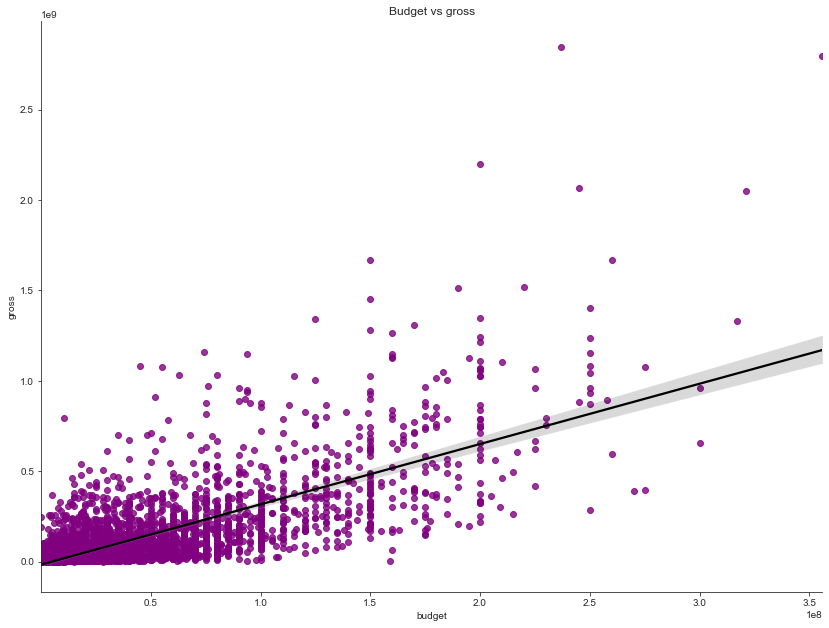

In [20]:
#regression plot budget vs gross using seaborn
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(14, 10.5)
sns.regplot(x='budget', y='gross', data=df1, scatter_kws={"color":"purple"}, line_kws={"color":"black"}).set_title("Budget vs gross")
sns.despine()

In [21]:
#now to start identifying corrolations: defualt type in IDE is pearson, others include kendall and spearman 
df1.corr(method = 'pearson')  

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [22]:
df1.corr(method = 'kendall') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [23]:
df1.corr(method = 'spearman') 

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [24]:
#based on 3 corrolation methods tested(not shown), it can be asserted that gross revenue and movie budget are highly corrolated 
#below are diagrams that eleborate on corrolation between metrics 

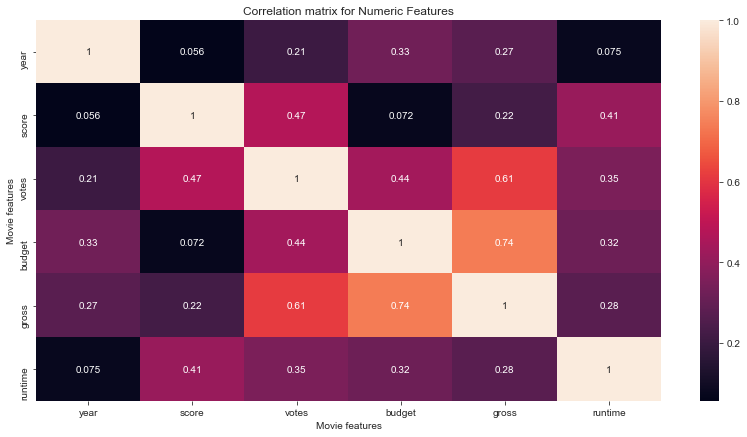

In [25]:
correlation_matrix = df1.corr()

plt.figure(figsize = (14, 7))

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [26]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.299905,0.770876,0.819617,0.754468,0.148468,0.285691,0.976423,0.607954,0.048235
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,0.299905,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392


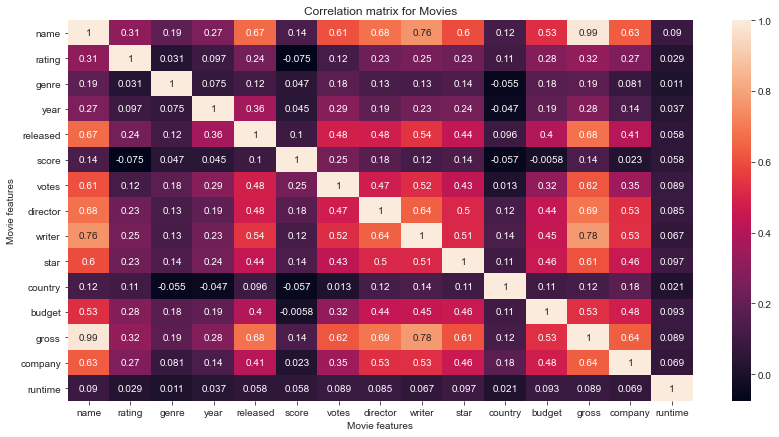

In [27]:
correlation_matrix = df1.apply(lambda x: x.factorize()[0]).corr(method='pearson')

plt.figure(figsize = (14, 7))

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [28]:
correlation_mat = df1.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name        1.000000
         rating      0.314800
         genre       0.186668
         year        0.267282
         released    0.667785
                       ...   
runtime  country     0.020546
         budget      0.092727
         gross       0.088572
         company     0.069329
         runtime     1.000000
Length: 225, dtype: float64


In [29]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

rating   score     -0.075109
score    rating    -0.075109
         country   -0.057087
country  score     -0.057087
         genre     -0.055109
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64


In [30]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

director  star        0.504992
star      director    0.504992
writer    star        0.510628
star      writer      0.510628
votes     writer      0.522918
writer    votes       0.522918
budget    name        0.526690
name      budget      0.526690
director  company     0.528071
company   director    0.528071
writer    company     0.532013
company   writer      0.532013
budget    gross       0.532810
gross     budget      0.532810
released  writer      0.541155
writer    released    0.541155
star      name        0.599410
name      star        0.599410
votes     name        0.608411
name      votes       0.608411
gross     star        0.612142
star      gross       0.612142
gross     votes       0.620450
votes     gross       0.620450
company   name        0.631721
name      company     0.631721
gross     company     0.637241
company   gross       0.637241
director  writer      0.642875
writer    director    0.642875
released  name        0.667785
name      released    0.667785
released

In [31]:
df1['Year'] = df1['released'].astype(str).str[:4]
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,Janu
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,June
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,May
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,Marc


In [32]:
# Looking at the top 15 companies by gross revenue
CompanyGrossSum = df1.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

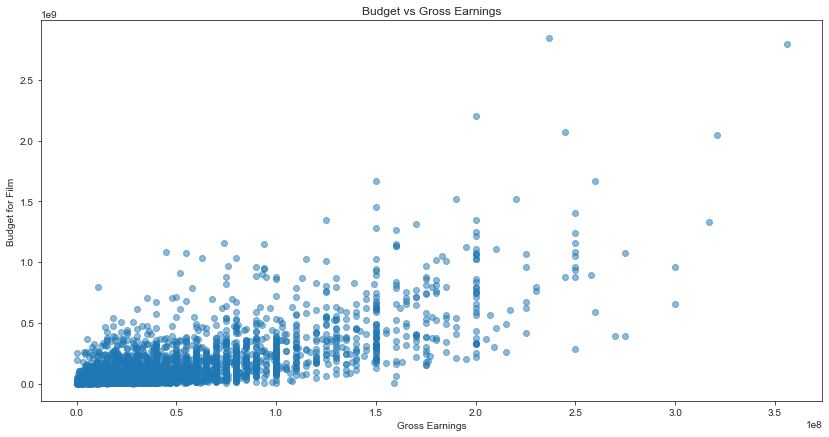

In [33]:
plt.figure(figsize = (14, 7))
plt.scatter(x=df1['budget'], y=df1['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()